
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the **Option C**.

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




In [1]:
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import polsartools as pst

In [2]:
""" 

Function to display images

"""

def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax

    num_images = len(filenames)

    if num_images == 1:
        # Single image case
        data = pst.read_rst(filenames[0])
        data[data==0]=np.nan
        vmin, vmax = compute_vmin_vmax(data)

        fig, ax = plt.subplots(figsize=(6, 6))
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filenames[0]))
        fig.colorbar(im, ax=ax)
        plt.tight_layout()
        plt.show()
    else:
        # Multiple image case
        ncols = min(max_cols, num_images)
        nrows = int(np.ceil(num_images / ncols))

        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
        axes = np.array(axes).reshape(-1)  # Flatten in case it's a 2D grid

        for i, filename in enumerate(filenames):
            data = pst.read_rst(filename)
            data[data==0]=np.nan
            vmin, vmax = compute_vmin_vmax(data)
            ax = axes[i]
            im = ax.imshow(data, vmin=vmin, vmax=vmax)
            ax.set_title(os.path.basename(filename))
            fig.colorbar(im, ax=ax)

        for j in range(num_images, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()


#### 1. Extract multilooked C2 matrix elements



In [ ]:
# Provide path to the extracted folder
dataFolder = r"../data/ESAR/C-band/06agrsar0205x1_t01"

#The follwoing function extracts single look S2 or mulit-looked T3/C3 matrix from ALOS-2 HBQ FP data

pst.esar_gtc(dataFolder,mat='C2',azlks=5,rglks=5)


Detected C-band ['VH', 'VV']



Progress:   0%|          | 0/36 [00:00<?, ?block/s]


Progress:   3%|▎         | 1/36 [00:08<04:46,  8.18s/block]


Progress:   6%|▌         | 2/36 [00:08<01:56,  3.43s/block]


Progress:  11%|█         | 4/36 [00:08<00:44,  1.38s/block]


Progress:  19%|█▉        | 7/36 [00:08<00:18,  1.56block/s]


Progress:  25%|██▌       | 9/36 [00:09<00:11,  2.29block/s]


Progress:  33%|███▎      | 12/36 [00:09<00:06,  3.50block/s]


Progress:  39%|███▉      | 14/36 [00:09<00:04,  4.59block/s]


Progress:  44%|████▍     | 16/36 [00:09<00:03,  5.82block/s]


Progress:  56%|█████▌    | 20/36 [00:09<00:01,  9.29block/s]


Progress:  81%|████████  | 29/36 [00:09<00:00, 19.60block/s]


Progress: 100%|██████████| 36/36 [00:09<00:00,  3.69block/s]

Saved file ../ESAR/C-band/06agrsar0205x1_t01\C2\C11.tif


Saved file ../ESAR/C-band/06agrsar0205x1_t01\C2\C12_real.tif


Saved file ../ESAR/C-band/06agrsar0205x1_t01\C2\C12_imag.tif


Saved file ../ESAR/C-band/06agrsar0205x1_t01\C2\C22.tif
Execution time for convert_S: 12.00 seconds


Execution time for esar_gtc: 13.00 seconds


#### 2. Speckle filtering using polarimetric refined-Lee filter

In [4]:
"""
The following function generates speckle filtered polarimetric matrices using the refined Lee polarimetric speckle filter: 
        
input C3/T3/C2/T2 folder path, window_size 

"""

C2Folder = os.path.join(dataFolder,'C2')
window_size = 3
pst.rlee(C2Folder,win=window_size)


Progress:   0%|          | 0/2 [00:00<?, ?block/s]


Progress:  50%|█████     | 1/2 [00:02<00:02,  2.75s/block]


Progress: 100%|██████████| 2/2 [00:02<00:00,  1.20s/block]


Progress: 100%|██████████| 2/2 [00:02<00:00,  1.44s/block]

Saved file ../ESAR/C-band/06agrsar0205x1_t01\rlee_3x3\C2\C11.tif
Saved file ../ESAR/C-band/06agrsar0205x1_t01\rlee_3x3\C2\C12_real.tif
Saved file ../ESAR/C-band/06agrsar0205x1_t01\rlee_3x3\C2\C12_imag.tif
Saved file ../ESAR/C-band/06agrsar0205x1_t01\rlee_3x3\C2\C22.tif
Execution time for rlee: 3.00 seconds


#### 3. Generate a quick look RGB from C2 matrix

RGB image saved as ../ESAR/C-band/06agrsar0205x1_t01\rlee_3x3\C2\RGB4.png
Execution time for dxpRGB: 0.00 seconds


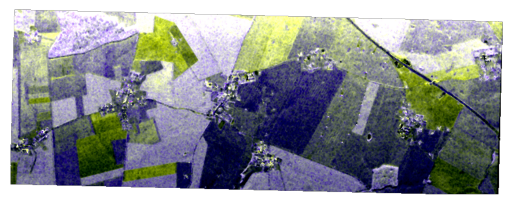

In [5]:
# update the C3 folder based on your folder
C2Folder = os.path.join(dataFolder,'rlee_3x3','C2')

pst.dxpRGB(C2Folder,type=4)

In [6]:
pst.dop_dp(C2Folder)


Progress:   0%|          | 0/2 [00:00<?, ?block/s]


Progress:  50%|█████     | 1/2 [00:02<00:02,  2.75s/block]


Progress: 100%|██████████| 2/2 [00:02<00:00,  1.38s/block]

Saved file ../ESAR/C-band/06agrsar0205x1_t01\rlee_3x3\C2\dopdp.tif
Execution time for dop_dp: 3.00 seconds


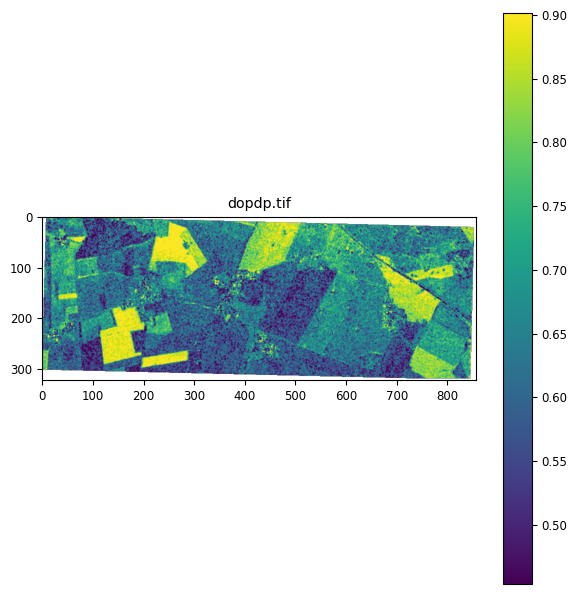

In [7]:

plot_images(C2Folder+'/dopdp.tif' )


In [8]:
pst.halpha_dp(C2Folder)


Progress:   0%|          | 0/2 [00:00<?, ?block/s]


Progress:  50%|█████     | 1/2 [00:04<00:04,  4.18s/block]


Progress: 100%|██████████| 2/2 [00:04<00:00,  2.14s/block]


Progress: 100%|██████████| 2/2 [00:04<00:00,  2.44s/block]

Saved file ../ESAR/C-band/06agrsar0205x1_t01\rlee_3x3\C2\Hdp.tif
Saved file ../ESAR/C-band/06agrsar0205x1_t01\rlee_3x3\C2\alphadp.tif
Saved file ../ESAR/C-band/06agrsar0205x1_t01\rlee_3x3\C2\e1_norm.tif
Saved file ../ESAR/C-band/06agrsar0205x1_t01\rlee_3x3\C2\e2_norm.tif
Execution time for halpha_dp: 5.00 seconds


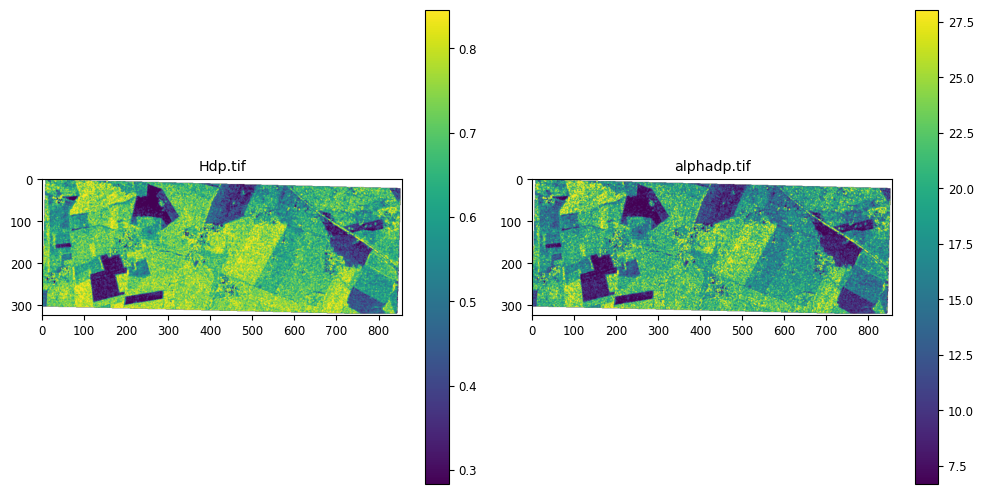

In [9]:
plot_images(C2Folder+'/Hdp.tif', 
            C2Folder + '/alphadp.tif')

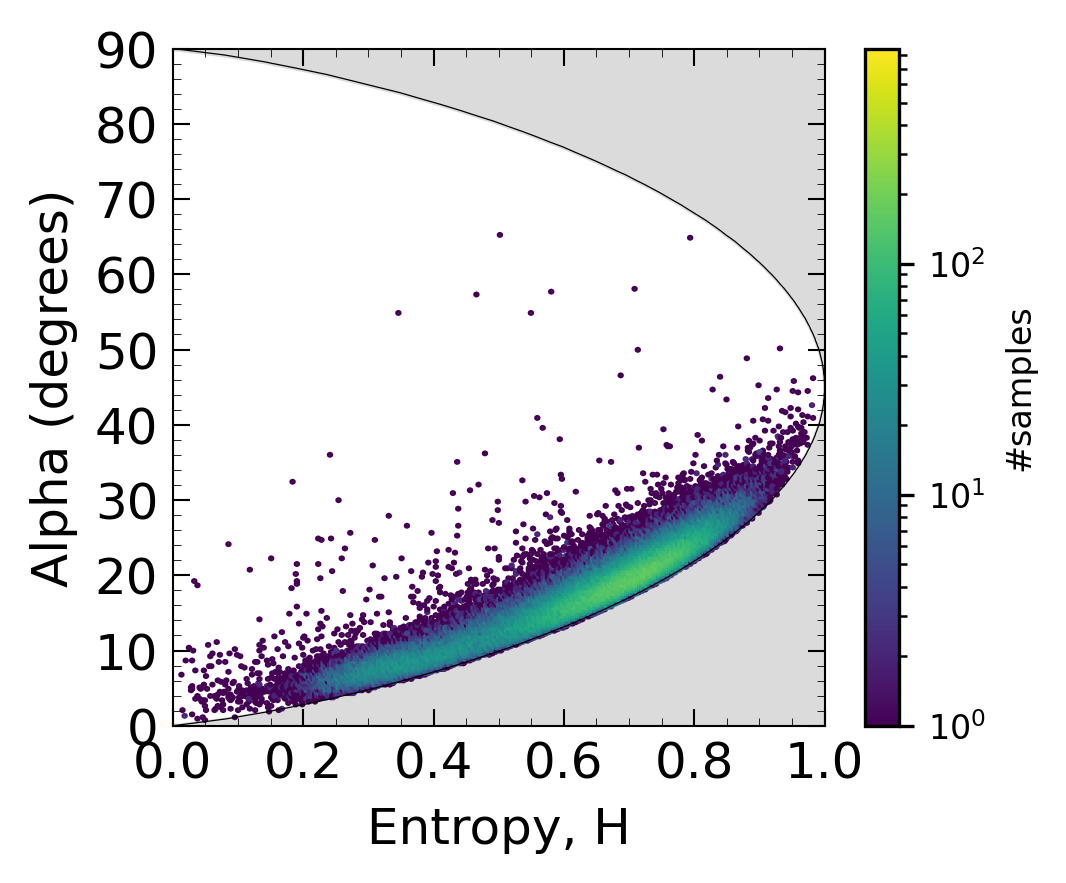

In [10]:


hFile = C2Folder + '/Hdp.tif'
alphaFile = C2Folder + '/alphadp.tif'

pst.halpha_plot_dp(hFile,alphaFile,norm='log')

